In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('spotify-2023.csv', encoding = 'cp1251')
print(data.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [3]:
empty_data = data.isna().sum()
print(empty_data)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [5]:
data.shape
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

1. Побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 
найпопулярніших пісень на Spotify у 2023 році за кількістю 
прослуховувань.

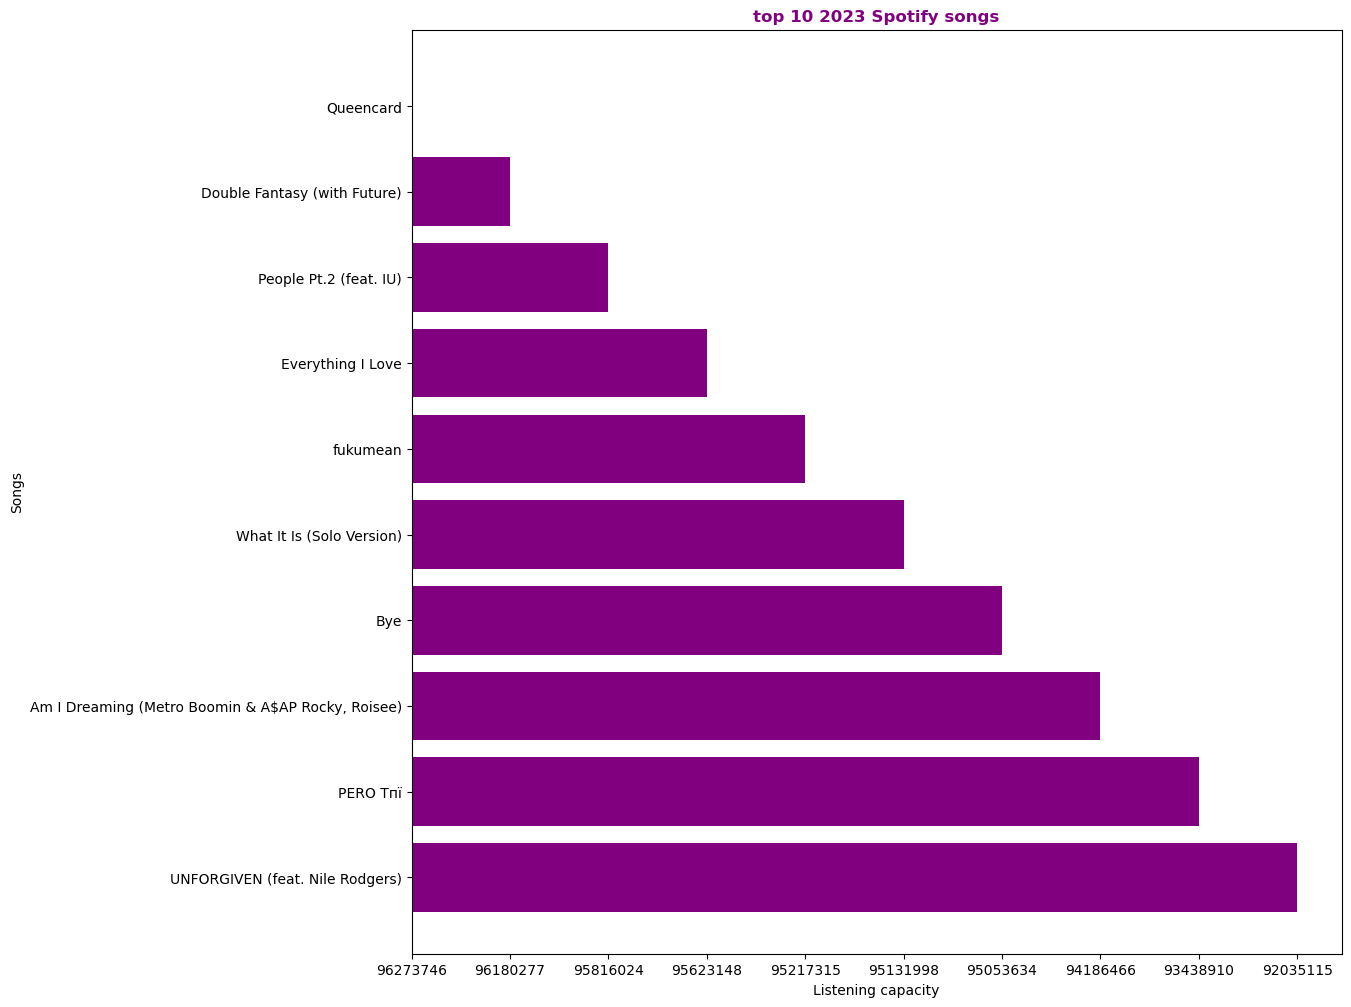

In [15]:
song_2023 = data[data["released_year"] == 2023]
top_songs = song_2023.sort_values(by = "streams", ascending = False).head(10)

plt.figure(figsize=(12, 12))
plt.barh(top_songs["track_name"], top_songs["streams"], color='purple')
plt.xlabel('Listening capacity')
plt.ylabel('Songs')
plt.title('top 10 2023 Spotify songs', fontweight='bold', color='purple')
plt.gca().invert_yaxis() 
plt.show()

Побудувати кругову діаграму для тих самих даних

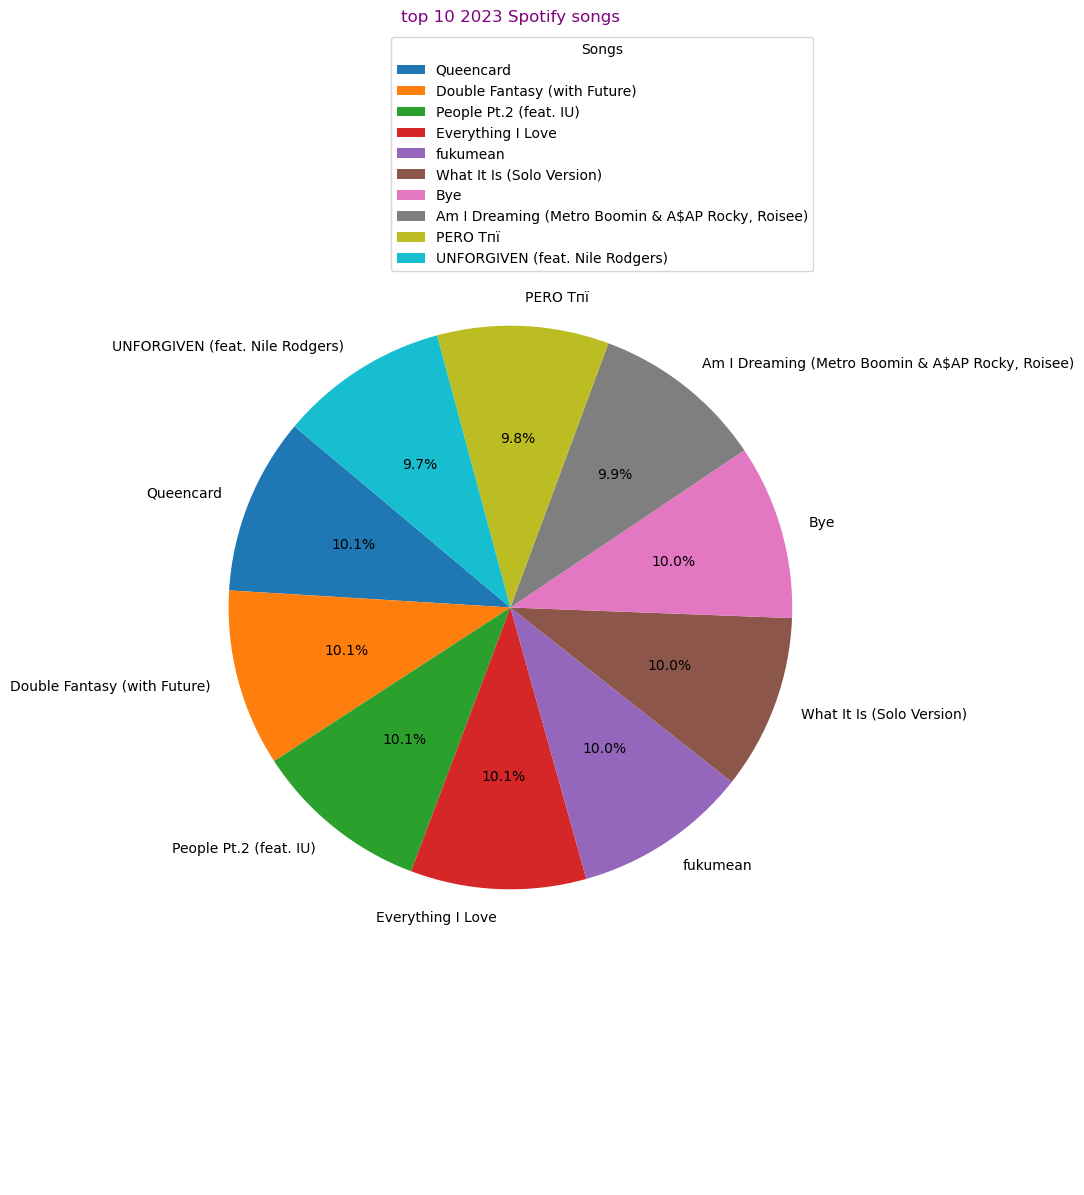

In [16]:
song_2023 = data[data["released_year"] == 2023]
top_songs = song_2023.sort_values(by = "streams", ascending = False).head(10)

plt.figure(figsize=(8, 15))
plt.pie(top_songs["streams"], labels= top_songs["track_name"], autopct='%1.1f%%', startangle=140)
plt.title('top 10 2023 Spotify songs', fontweight='regular', color='purple')
plt.axis('equal')  
plt.legend(title = "Songs", loc="best")
plt.show()

2.Створіть кругову діаграму або секторну діаграму, яка відображає розподіл
за danceability серед найпопулярніших пісень у 2023 році.

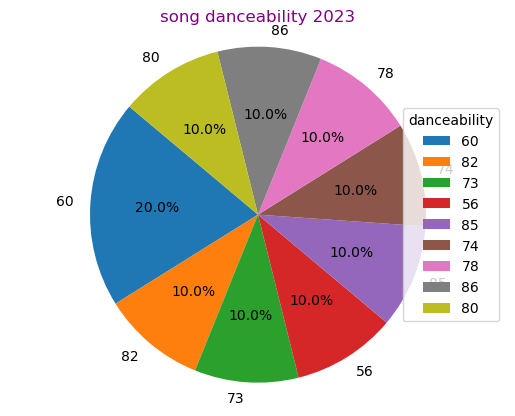

In [13]:
dance_counts = top_songs["danceability_%"].value_counts()
plt.tight_layout()
plt.pie(dance_counts, labels = dance_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('song danceability 2023', fontweight='regular', color='purple')
plt.axis('equal')  
plt.legend(title = "danceability", loc="right")
plt.show()



3.Побудуйте лінійний графік, який відображає зміни кількості прослуховувань 
певного треку протягом року 2023 року.

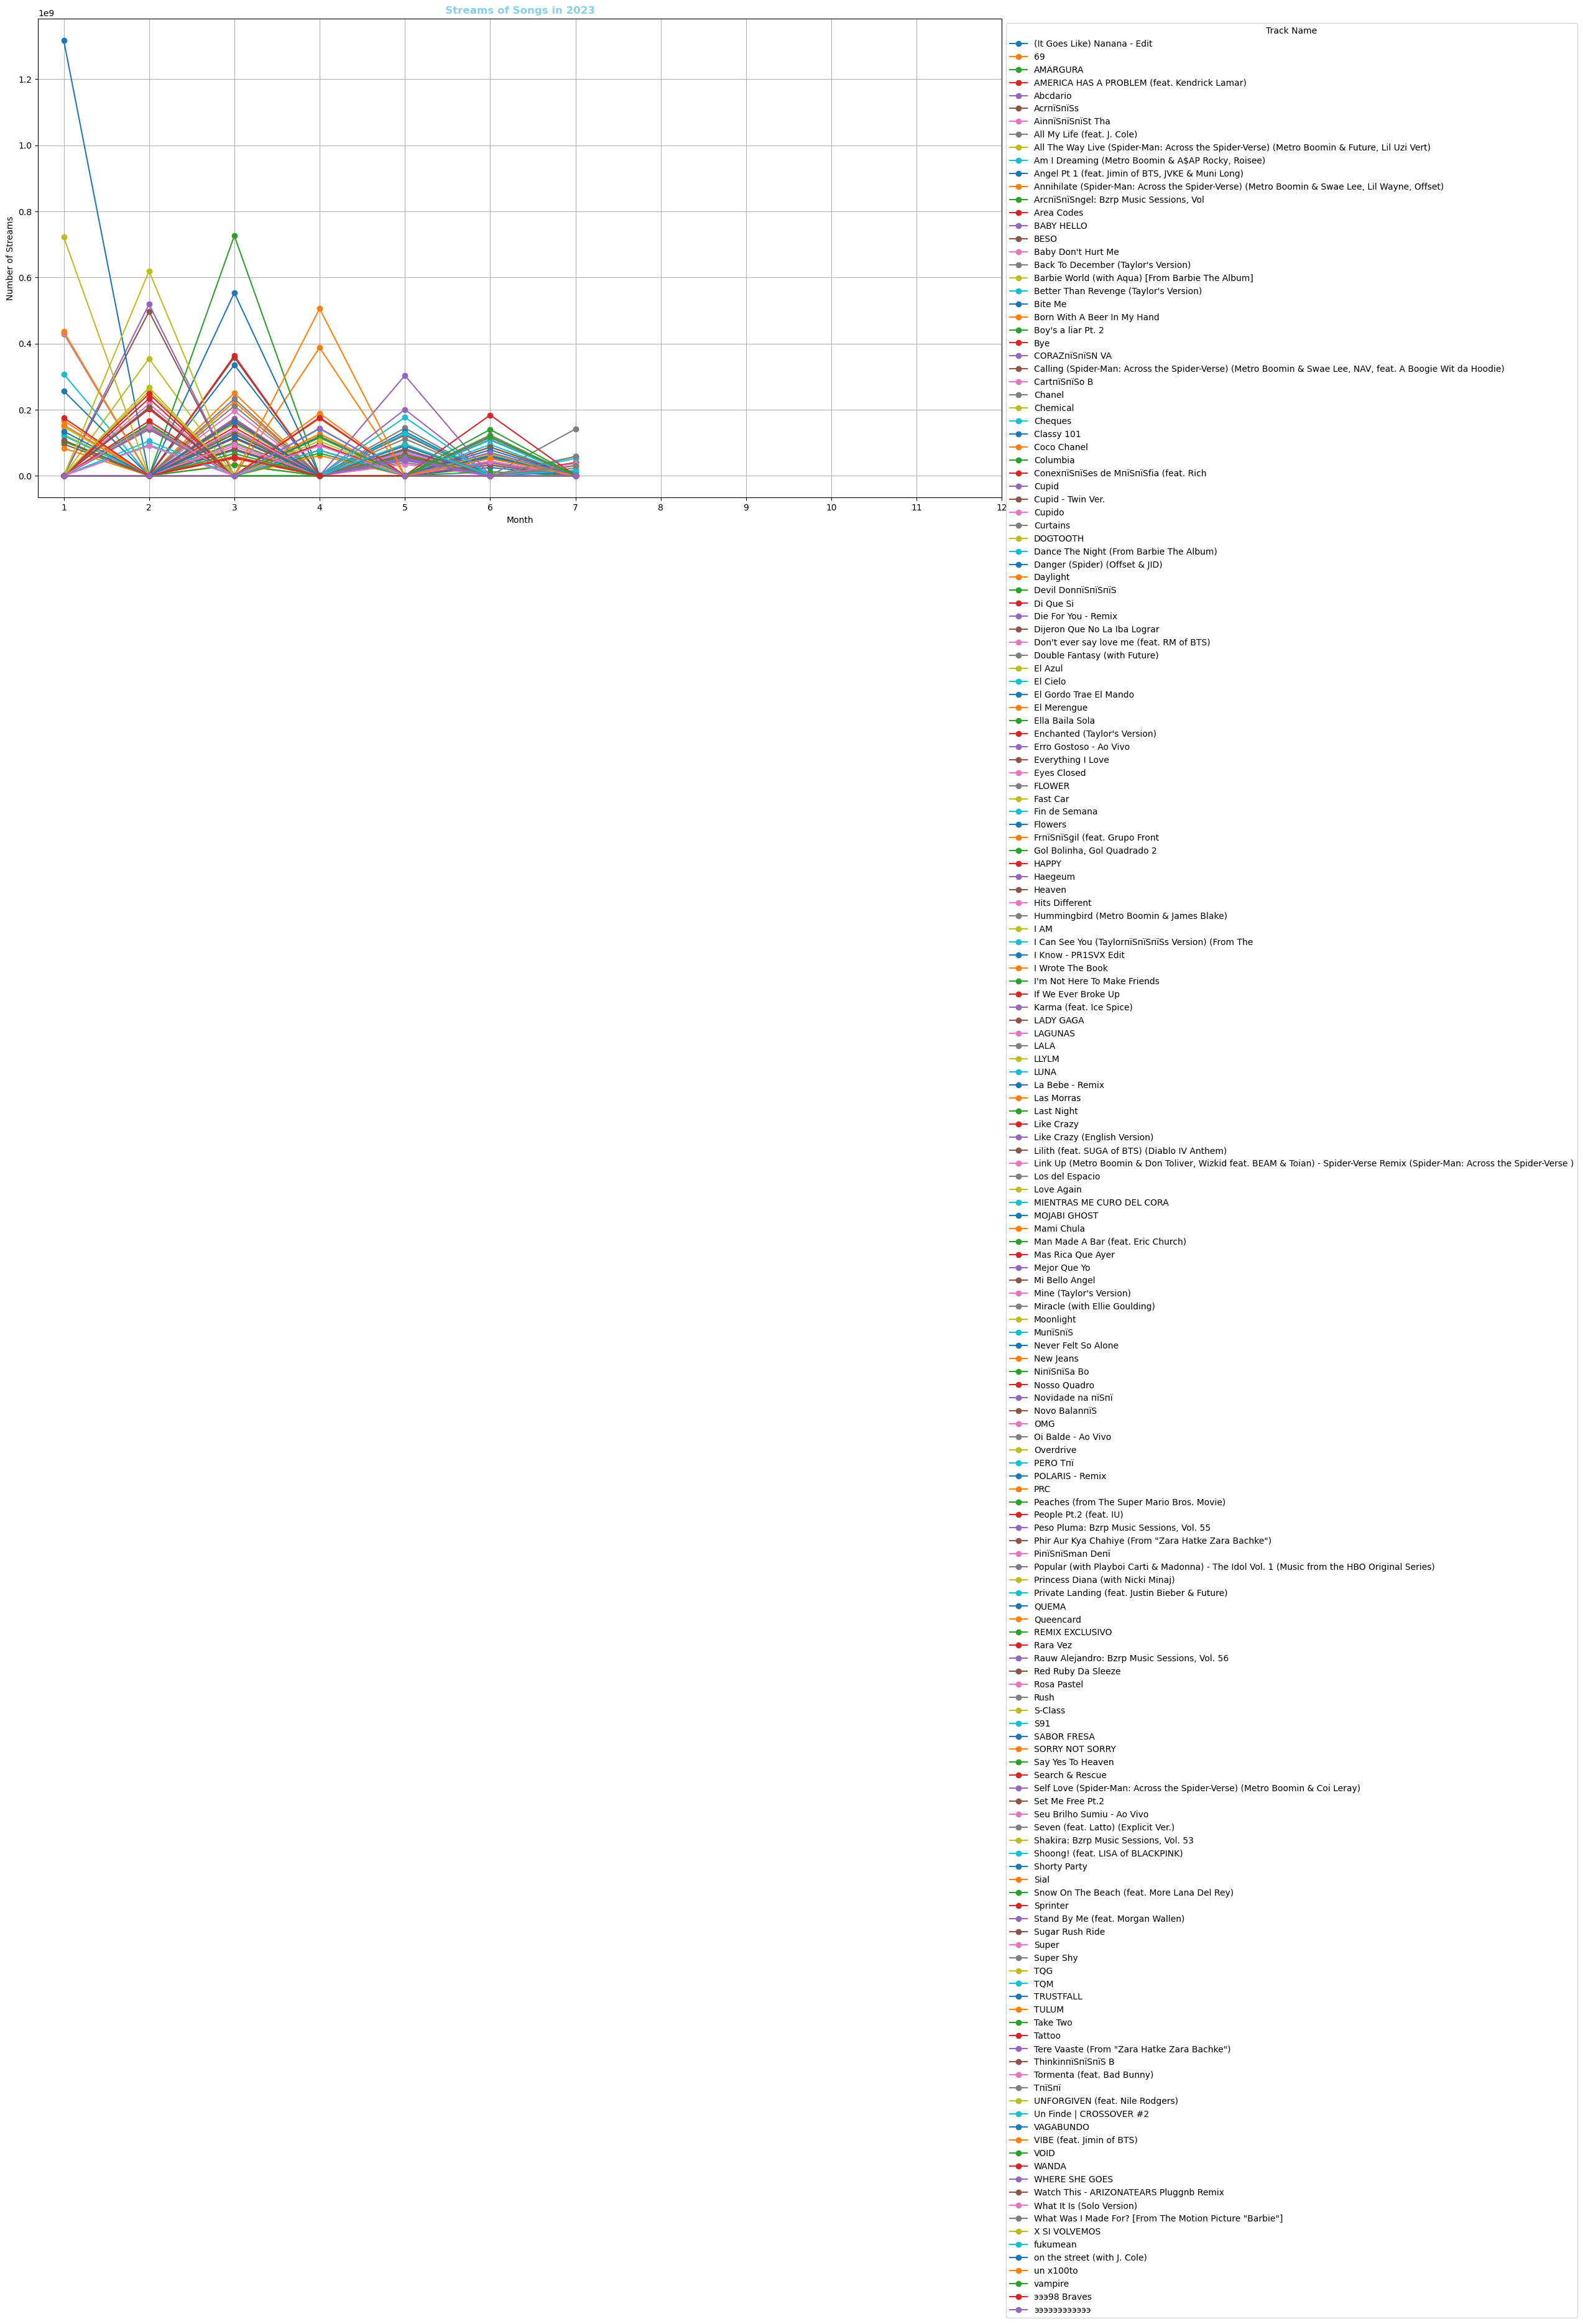

In [17]:
data = data[pd.to_numeric(data['streams'], errors='coerce').notna()]
data['streams'] = data['streams'].astype('float64')

data_2023 = data[data["released_year"] == 2023]

monthly_streams = data_2023.groupby(['released_month', 'track_name'])['streams'].sum().unstack().fillna(0)

plt.figure(figsize=(20, 10))
for track_name in monthly_streams.columns:
    plt.plot(monthly_streams.index, monthly_streams[track_name], marker='o', label=track_name)

plt.title('Streams of Songs in 2023', fontweight='bold', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Streams')
plt.xticks(range(1, 13))  
plt.legend(title='Track Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



4.Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших 
артистів на Spotify у 2023 році за кількістю слухачів.

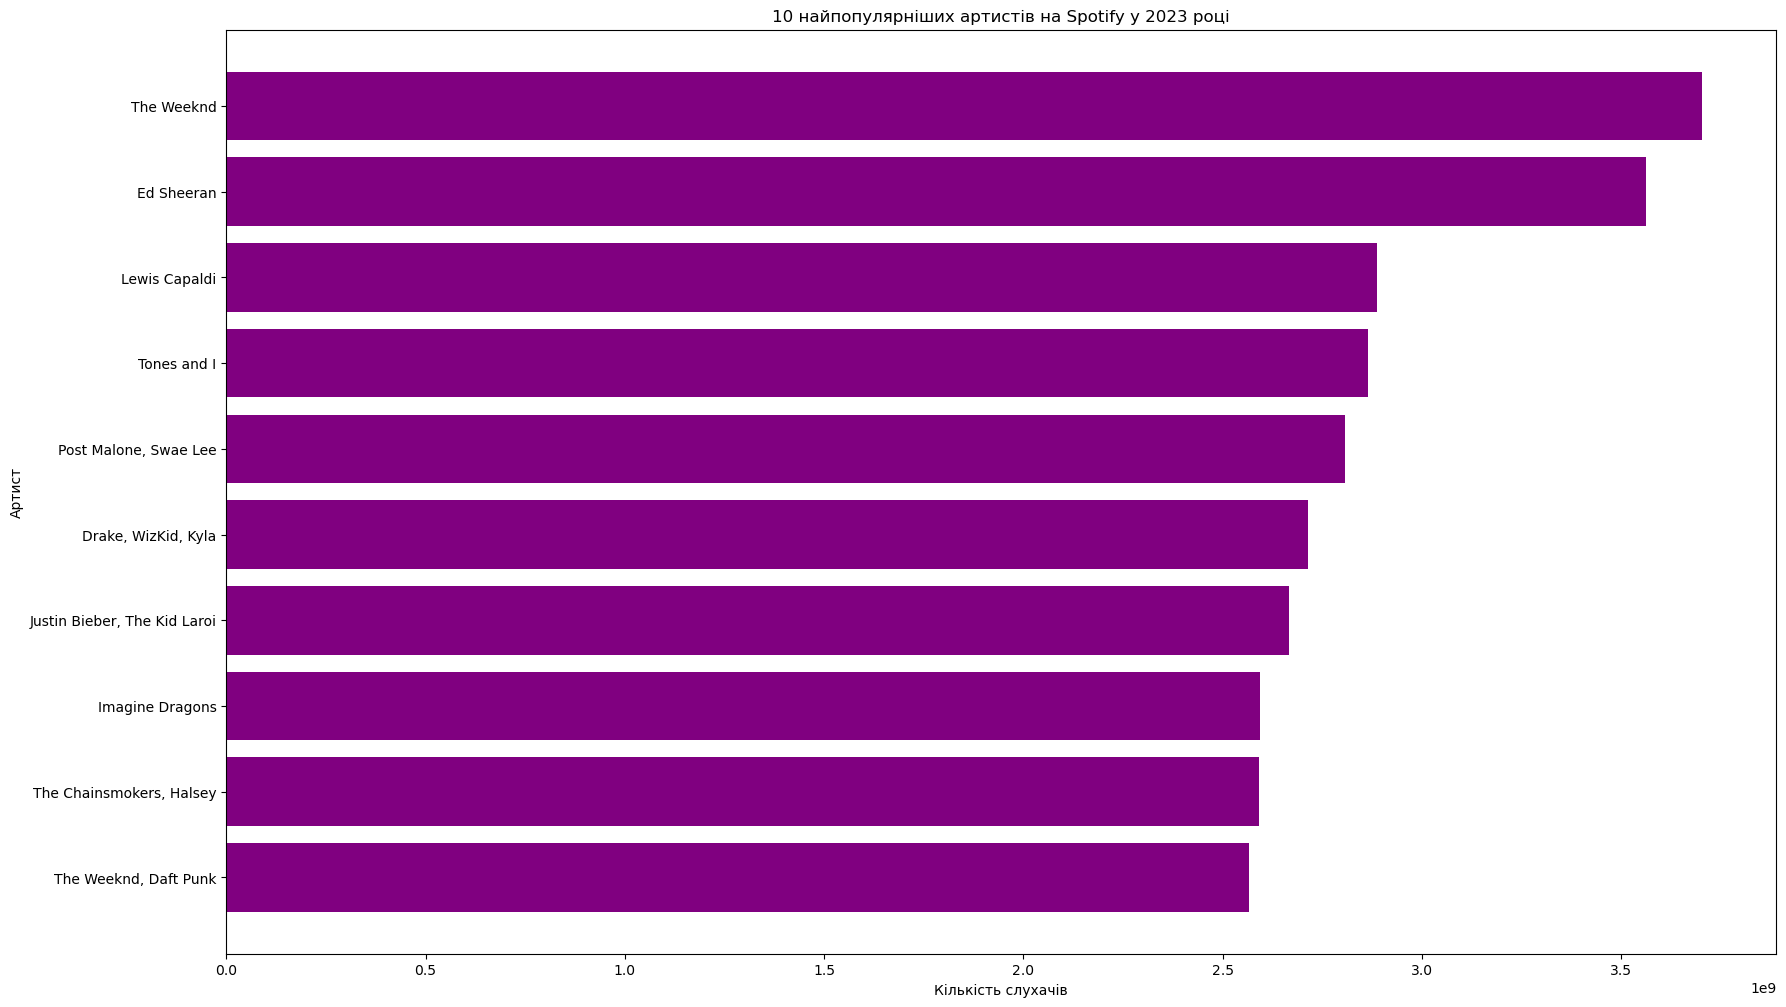

In [18]:
data = data.sort_values(by="streams", ascending=False)
top_10_artists = data.head(10)
plt.figure(figsize=(20, 12))
plt.barh(top_10_artists['artist(s)_name'], top_10_artists['streams'], color='purple')
plt.xlabel('Number of listeners')
plt.ylabel('Artist')
plt.title('top 10 2023 Spotify artists')
plt.gca().invert_yaxis()
plt.show()

5.Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість 
прослуховувань трьох конкретних треків у 2023 році.

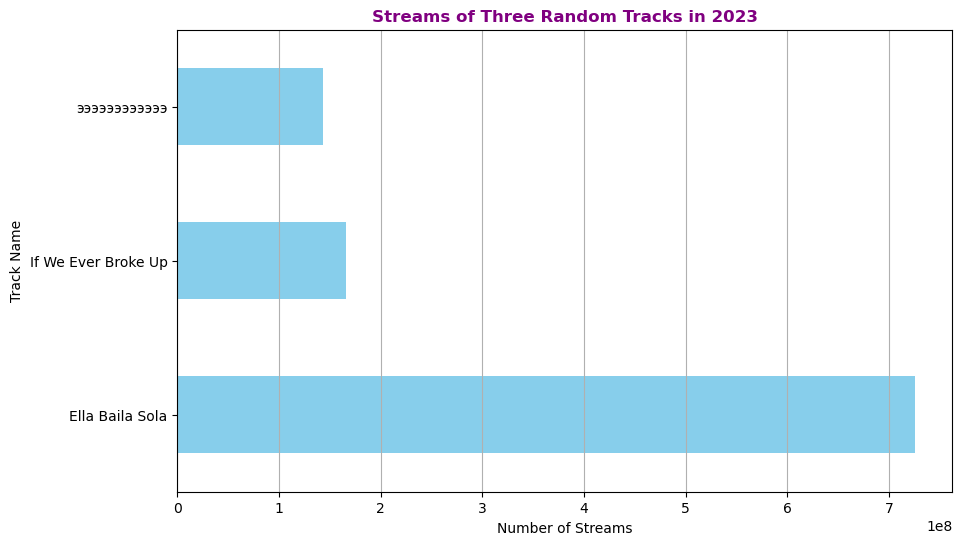

In [20]:
import random

data_2023 = data[data["released_year"] == 2023]
random_tracks = random.sample(list(data_2023["track_name"].unique()), 3)
tracks_data = data_2023[data_2023["track_name"].isin(random_tracks)]
tracks_streams = tracks_data.groupby('track_name')['streams'].sum()
plt.figure(figsize=(10, 6))
tracks_streams.plot(kind='barh', color='skyblue')
plt.title('Streams of Three Random Tracks in 2023', fontweight='bold', color='purple')
plt.xlabel('Number of Streams')
plt.ylabel('Track Name')
plt.grid(axis='x')
plt.show()

